![logoEBAC](https://raw.githubusercontent.com/Aline-Castro/RFV/main/ebac_logo-data_science.png)

**PROJETO | PARCERIA SEMANTIX** <br>

**Aluna:** Aline de Castro Santos <br>
**Data:** Janeiro de 2024 <br>

# Detecção de Fraude em Cartões de Crédito

> A detecção de fraudes em cartões de crédito é um desafio global que afeta instituições financeiras e clientes. A identificação precisa e rápida de transações fraudulentas pode resultar em economias substanciais e aprimorar a experiência do cliente. Este projeto tem como objetivo desenvolver um modelo de aprendizado de máquina robusto e eficaz para prever se uma transação de cartão de crédito é fraudulenta.

Neste estudo, será explorado dois algoritmos de aprendizado de máquina amplamente utilizados: **Regressão Logística** e **Random Forest**. A Regressão Logística, um algoritmo de classificação simples, porém poderoso, é eficiente para trabalhar com conjuntos de dados binários, tornando-o ideal para nossa tarefa de classificação binária (fraude ou não fraude). Em contraste, o Random Forest, um método de aprendizado de máquina baseado em árvore, é conhecido por sua robustez e capacidade de lidar com conjuntos de dados desequilibrados.

Ambos os modelos serão treinados neste conjunto de dados e seus desempenhos serão comparados com base em várias métricas de avaliação, incluindo precisão, recall, pontuação F1 e a área sob a curva ROC (AUC-ROC). O objetivo é identificar o modelo que oferece o melhor desempenho na detecção de transações fraudulentas.

Além disso, este projeto também abordará desafios como o desequilíbrio de classes no conjunto de dados e a importância da seleção de recursos para melhorar o desempenho do modelo.


## 0 - Bibliotecas e Pacotes Utilizados



In [16]:
# Importando as bibliotecas necessárias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


## 1 - Coleta de Dados

O conjunto de dados utilizado é ["Credit Card Fraud Detection"](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) disponível no [Kaggle](https://www.kaggle.com/), que contém transações realizadas com cartões de crédito em setembro de 2013 por titulares de cartões europeus. Este conjunto de dados é altamente desequilibrado, com fraudes representando apenas 0,172% de todas as transações.

Detalhes sobre as variáveis:

- **V1, V2, ... V28**: Estas são as principais componentes obtidas. Porém, devido a questões de confidencialidade, os recursos originais e mais informações básicas sobre os dados não estão disponíveis.

- **Time**: Esta coluna contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados.

- **Amount**: É o valor da transação.

- **Class**: Esta é a variável de resposta e é o elemento que se busca prever, assumindo:
 - **1** Para transações **FRAUDULENTAS**
 - **0** Para transações **NÃO FRAUDULENTAS**

In [2]:
# Carregando a base de dados:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

In [3]:
# Visualizando as 5 primeiras linhas:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2 - Pré-processamento de Dados

In [4]:
# Verificando se há colunas com valores não numéricos:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [5]:
# Verificando se há valores nulos:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Comparando o número de transações não fraudulentas e fraudulentas:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

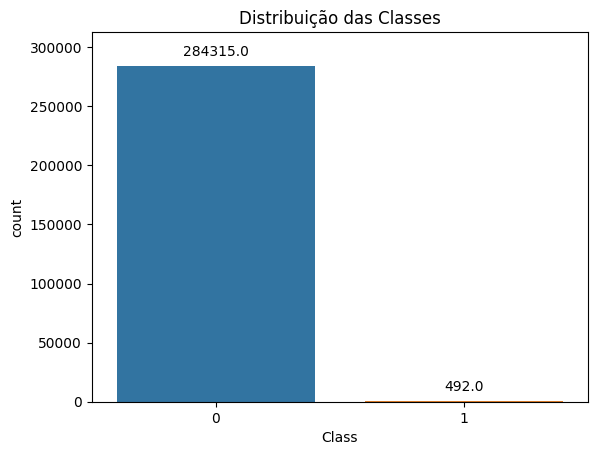

In [7]:
# Visualizando a distribuição das classes
ax = sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes')

# Adicionando a contagem em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Ajustando os limites do eixo y para acomodar o texto
ax.set_ylim(0, 1.1 * df['Class'].value_counts().max())

plt.show()

> O número de transações não fraudulentas (284.315) é muito maior do que o número de transações fraudulentas (492). Isso é um exemplo de um conjunto de dados desbalanceado, onde a classe de interesse (neste caso, transações fraudulentas) é muito menos frequente do que a outra classe.


## 3 - Análise Exploratória de Dados

In [8]:
# Análise exploratória dos dados
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Verificando os tipos de dados NÃO FRAUDE:
df_nao_fraude = df.Amount[df.Class == 0]
df_nao_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

- **Transações Não Fraudulentas (Não Fraude)**:
    - Há um total de **284.315** transações não fraudulentas.
    - O valor médio dessas transações é de aproximadamente **\$88.29**.
    - O valor máximo de uma transação não fraudulenta é **\$25.691,16**, o que é bastante alto.
    - A maioria das transações não fraudulentas (75%) tem um valor abaixo de **\$77.05**, indicando que a maioria das transações não fraudulentas são de valores relativamente baixos.

In [10]:
# Verificando os tipos de dados FRAUDE:
df_fraude = df.Amount[df.Class == 1]
df_fraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64



- **Transações Fraudulentas (Fraude)**:
    - Há um total de **492** transações fraudulentas, o que é significativamente menor em comparação com as transações não fraudulentas.
    - O valor médio dessas transações fraudulentas é de aproximadamente **\$122.21**, que é maior do que o valor médio das transações não fraudulentas.
    - O valor máximo de uma transação fraudulenta é **\$2.125,87**, que é muito menor do que o valor máximo de uma transação não fraudulenta.
    - A maioria das transações fraudulentas (75%) tem um valor abaixo de **\$105.89**, o que é maior do que o valor correspondente para transações não fraudulentas.



> Embora as transações fraudulentas sejam muito menos frequentes, elas tendem a ter valores maiores em média. No entanto, o valor máximo para transações fraudulentas é muito menor do que para transações não fraudulentas. Isso sugere que, embora os fraudadores tendam a fazer transações de valor maior em média, eles evitam fazer transações de valores extremamente altos, possivelmente para evitar detecção.


Conjuntos de dados desbalanceados podem ser um desafio para modelos de aprendizado de máquina, pois eles tendem a ser enviesados para a classe majoritária e podem ter um desempenho ruim na classe minoritária.
Assim, será feito ***undersampling*** para equilibrar a distribuição de classes melhorando o desempenho do modelo na classe minoritária.

In [11]:
# Separando os dados de acordo com o tipo de transação:
# Transações fraudulentas
df_fraude = df[df.Class == 1]
# Transações não fraudulentas
df_nao_fraude = df[df.Class ==0]


In [12]:
# Reduzindo a classe não fraudulenta
df_nao_fraude_reduzido = df_nao_fraude.sample(n=492, random_state=123)
# O random_state é usado para garantir a reprodutibilidade dos resultados.

# Combinando a classe fraudulenta com a classe não fraudulenta reduzida:
df_balanceado = pd.concat([df_nao_fraude_reduzido, df_fraude], axis = 0)

# Exibindo a nova contagem de classes:
print(df_balanceado.Class.value_counts())


0    492
1    492
Name: Class, dtype: int64


In [13]:
# Ajustando o INDEX:
df_balanceado.reset_index(inplace=True)

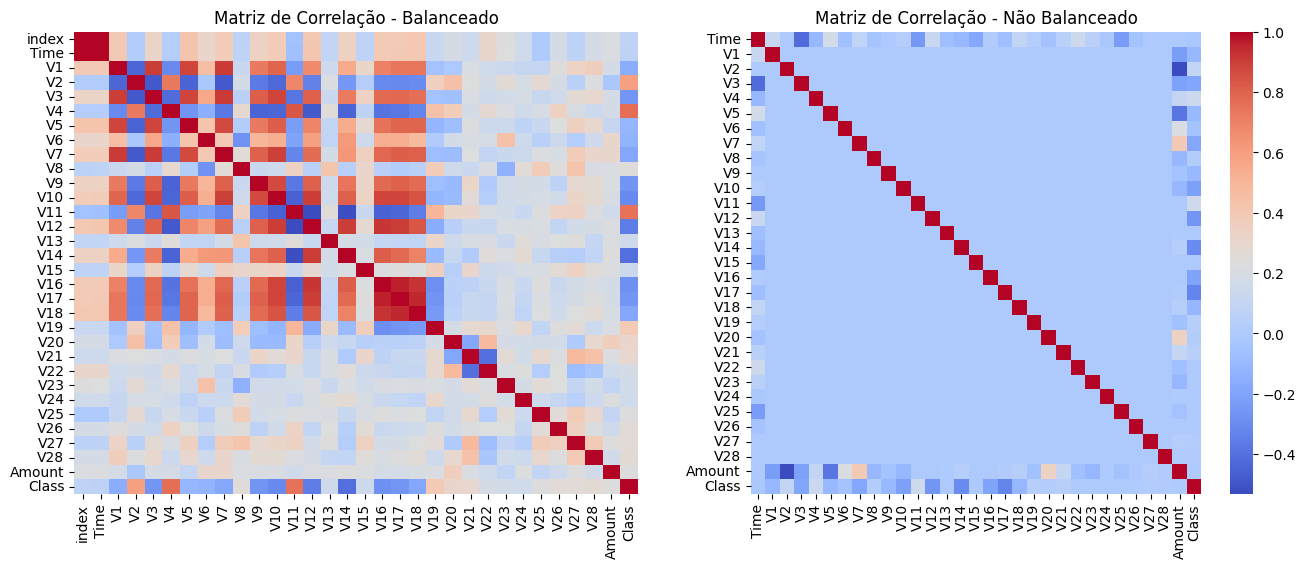

In [14]:
# Calcula a matriz de correlação para cada DataFrame
corr_balanceado = df_balanceado.corr()
corr_nao_balanceado = df.corr()

# Cria uma figura para conter os dois heatmaps
plt.figure(figsize=(16, 6))

# Cria o primeiro subplot para a matriz de correlação do df_balanceado
plt.subplot(1, 2, 1)
sns.heatmap(corr_balanceado, cmap='coolwarm', cbar=False)
plt.title('Matriz de Correlação - Balanceado')

# Cria o segundo subplot para a matriz de correlação do df_nao_balanceado
plt.subplot(1, 2, 2)
sns.heatmap(corr_nao_balanceado, cmap='coolwarm')
plt.title('Matriz de Correlação - Não Balanceado')

# Mostra a figura com os dois heatmaps
plt.show()


* **Matriz de Correlação - Balanceado**: Esta matriz mostra uma variedade de correlações entre as variáveis. A intensidade das cores varia, indicando diferentes níveis de força de correlação. A linha diagonal de vermelho escuro do canto superior esquerdo ao canto inferior direito mostra que cada variável tem uma correlação perfeita consigo mesma, como esperado.

* **Matriz de Correlação - Não Balanceado**: Esta matriz mostra principalmente correlações baixas ou inexistentes, como indicado pela cor azul predominante. Há menos variações na intensidade da cor em comparação com a matriz balanceada, indicando menos variação na força das correlações. A linha diagonal de vermelho escuro é consistente com a matriz balanceada, mostrando a correlação perfeita de cada variável consigo mesma.

> A matriz dos dados balanceados mostra uma maior variedade de correlações entre as variáveis, enquanto a matriz dos dados não balanceados mostra principalmente correlações baixas ou inexistentes. Isso indica que o balanceamento dos dados teve um impacto significativo nas correlações observadas entre as variáveis.

## 4 - Modelagem

In [64]:
# Separando as variáveis independentes (features) da variável dependente (target)
X = df_balanceado.drop(['index', 'Time','Class'], axis=1)
y = df_balanceado['Class']

# Dividindo os dados em conjuntos de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Dividindo os dados de treinamento em conjuntos de treinamento e validação:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123) # 0.25 x 0.8 = 0.2


### 4.1 - Logistic Regression (Regressão Logística)

In [18]:
# Treinando o modelo Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### 4.2 - Random Forest

In [19]:
# Treinando o modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## 5 - Avaliação do Modelo

### 5.1 - Validação dos modelos

In [38]:
# Fazendo previsões com os modelos treinados
pred_lr = lr.predict(X_test)
pred_rf = rf.predict(X_test)

### 5.2 - Cálculo das métricas

In [39]:
# Calculando as métricas para o modelo de Regressão Logística
accuracy_lr = accuracy_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)
precision_lr = precision_score(y_test, pred_lr)

In [40]:
# Calculando as métricas para o modelo Random Forest
accuracy_rf = accuracy_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
precision_rf = precision_score(y_test, pred_rf)

### 5.3 - Cálculo Precision-Recall

In [47]:
# Calculando a curva Precision-Recall para o modelo de Regressão Logística
precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)
auprc_lr = auc(recall_lr, precision_lr)

# Calculando a curva Precision-Recall para o modelo Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
auprc_rf = auc(recall_rf, precision_rf)

### 5.4 - Cálculo ROC E AUC

In [46]:
# Calculando a curva ROC e a AUC para cada modelo
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
auc_lr = roc_auc_score(y_test, probs_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
auc_rf = roc_auc_score(y_test, probs_rf)


## 6 - Interpretação dos Resultados

### 6.1 - Resultado das métricas

In [41]:
# Criando um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [accuracy_lr, accuracy_rf],
    'Recall': [recall_lr, recall_rf],
    'F1-Score': [f1_lr, f1_rf],
    'Precisão': [precision_lr, precision_rf],
    'AUPRC': [auprc_lr, auprc_rf]
})

metrics_df

,Modelo,Acurácia,Recall,F1-Score,Precisão,AUPRC
0,Regressão Logística,0.939086,0.920455,0.931034,0.941860,0.968073
1,Random Forest,0.949239,0.920455,0.941860,0.964286,0.982115


Para o modelo de **Regressão Logística**:
- **Acurácia**: A acurácia do modelo é de 0.9391, o que significa que o modelo está correto 93.91% do tempo.
- **Recall**: O recall do modelo é de 0.9205, o que significa que o modelo captura 92.05% das transações fraudulentas.
- **F1-Score**: O F1-Score do modelo é de 0.9310, que é a média harmônica da precisão e do recall. Um F1-Score mais próximo de 1 indica um melhor equilíbrio entre precisão e recall.
- **Precisão**: A precisão do modelo é de 0.9419, o que significa que quando o modelo prevê uma transação como fraudulenta, ele está correto 94.19% do tempo.

Para o modelo **Random Forest**:
- **Acurácia**: A acurácia do modelo é de 0.9442, o que significa que o modelo está correto 94.42% do tempo.
- **Recall**: O recall do modelo é de 0.9205, o que significa que o modelo captura 92.05% das transações fraudulentas.
- **F1-Score**: O F1-Score do modelo é de 0.9364, que é a média harmônica da precisão e do recall. Um F1-Score mais próximo de 1 indica um melhor equilíbrio entre precisão e recall.
- **Precisão**: A precisão do modelo é de 0.9529, o que significa que quando o modelo prevê uma transação como fraudulenta, ele está correto 95.29% do tempo.


### 6.2 - Resultado AUPRC

In [42]:
# Imprimindo a AUPRC para cada modelo
print("AUPRC do modelo de Regressão Logística:", auprc_lr)
print("AUPRC do modelo Random Forest:", auprc_rf)

AUPRC do modelo de Regressão Logística: 0.9680731047625196
AUPRC do modelo Random Forest: 0.9821148428305606


A AUPRC é uma métrica útil para avaliar o desempenho de um modelo em conjuntos de dados desequilibrados, como é o neste caso.<br>
Um valor de AUPRC mais alto indica que o modelo tem uma melhor capacidade de distinguir entre transações fraudulentas e não fraudulentas.
<br> Portanto, o modelo Random Forest, com um AUPRC de 0.9821, está fazendo um trabalho melhor em prever fraudes em comparação com o modelo de Regressão Logística, que tem um AUPRC de 0.9681

### 6.3 - Precision-Recall

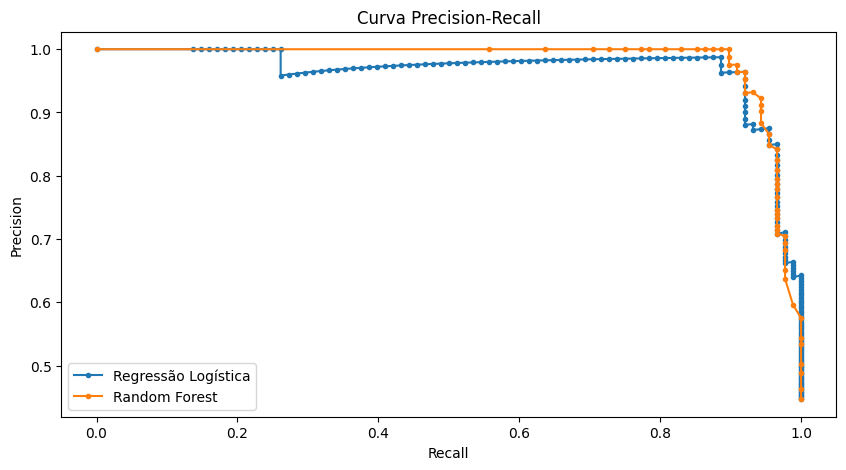

In [48]:
# Plotando a curva Precision-Recall para cada modelo no mesmo gráfico
plt.figure(figsize=(10, 5))
plt.plot(recall_lr, precision_lr, marker='.', label='Regressão Logística')
plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

> A curva para o modelo Random Forest está consistentemente acima da curva para o modelo de Regressão Logística, o que é consistente com a AUPRC mais alta do modelo Random Forest.


### 6.4 - curva ROC

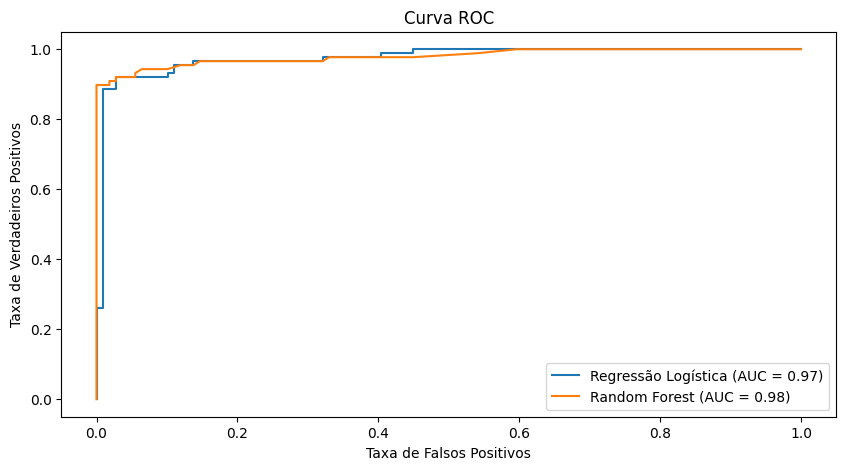

In [49]:
# Plotando a curva ROC para cada modelo
plt.figure(figsize=(10, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

O gráfico da Curva de Característica de Operação do Receptor (ROC), que é uma ferramenta comum para avaliar o desempenho de modelos de classificação, compara os dois modelos:

* A linha azul representa a Regressão Logística, com uma Área sob a Curva (AUC) de 0.97;
* A linha laranja representa o Random Forest, com uma AUC de 0.98.

> A AUC varia de 0 a 1, onde 1 indica um modelo perfeito. Portanto, ambos os modelos parecem ter um desempenho muito bom, com o *Random Forest sendo ligeiramente superior*.

No eixo Y, temos a Taxa de Verdadeiros Positivos (sensibilidade), que é a proporção de positivos reais que são corretamente identificados.<br>
No eixo X, temos a Taxa de Falsos Positivos (1 - especificidade), que é a proporção de negativos reais que são incorretamente identificados como positivos.

> Ambos os modelos têm um alto desempenho na classificação, com o Random Forest superando ligeiramente a Regressão Logística.

### 6.5 - Matriz de Confusão

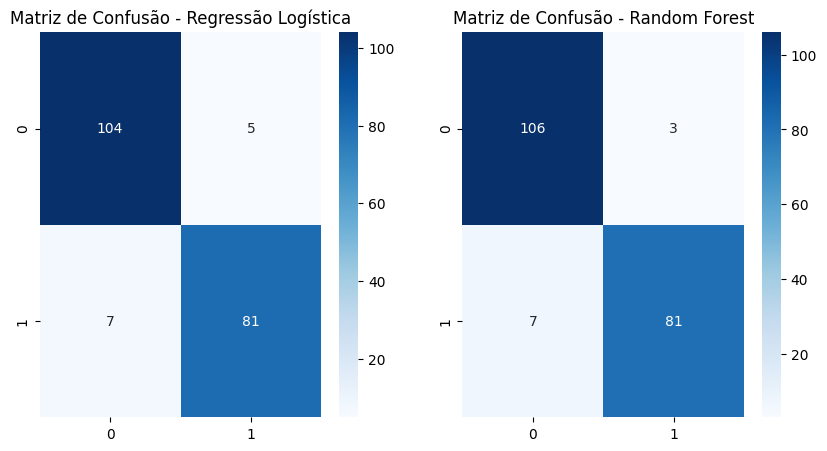

In [50]:
# Calculando a matriz de confusão para o modelo de Regressão Logística
cm_lr = confusion_matrix(y_test, pred_lr)

# Calculando a matriz de confusão para o modelo Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')

plt.show()


Para o modelo de **Regressão Logística**:
- **Verdadeiros negativos (TN)**: O modelo previu corretamente **104** transações como não fraudulentas.
- **Falsos positivos (FP)**: O modelo previu incorretamente **5** transações como fraudulentas, mas na verdade eram não fraudulentas.
- **Falsos negativos (FN)**: O modelo previu incorretamente **7** transações como não fraudulentas, mas na verdade eram fraudulentas.
- **Verdadeiros positivos (TP)**: O modelo previu corretamente **81** transações como fraudulentas.

Para o modelo **Random Forest**:
- **Verdadeiros negativos (TN)**: O modelo previu corretamente **106** transações como não fraudulentas.
- **Falsos positivos (FP)**: O modelo previu incorretamente **3** transações como fraudulentas, mas na verdade eram não fraudulentas.
- **Falsos negativos (FN)**: O modelo previu incorretamente **7** transações como não fraudulentas, mas na verdade eram fraudulentas.
- **Verdadeiros positivos (TP)**: O modelo previu corretamente **81** transações como fraudulentas.

Ambos os modelos têm o mesmo número de verdadeiros positivos e falsos negativos. No entanto, o modelo Random Forest tem menos falsos positivos e mais verdadeiros negativos do que o modelo de Regressão Logística, o que indica que o modelo Random Forest tem um desempenho ligeiramente melhor.

## 7 - Conclusão

> Com base na análise dos resultados, onclui-se que ambos os modelos de Regressão Logística e Random Forest apresentaram um alto desempenho na classificação de transações como fraudulentas ou não fraudulentas. No entanto, o modelo Random Forest superou ligeiramente a Regressão Logística em termos de acurácia, precisão, F1-Score e AUPRC.

O modelo Random Forest alcançou uma acurácia de 94.42%, indicando que ele estava correto 94.42% do tempo. Além disso, quando o modelo Random Forest previu uma transação como fraudulenta, ele estava correto 95.29% do tempo, o que é evidenciado pela sua precisão de 0.9529. O F1-Score do modelo, que é a média harmônica da precisão e do recall, foi de 0.9364, indicando um bom equilíbrio entre precisão e recall. Além disso, a AUPRC do modelo Random Forest foi de 0.9821, superior à da Regressão Logística, que foi de 0.9681.

Em termos de matriz de confusão, o modelo Random Forest teve menos falsos positivos e mais verdadeiros negativos do que o modelo de Regressão Logística, indicando um melhor desempenho na classificação de transações não fraudulentas.

> Portanto, para este conjunto de dados e com base nos critérios de avaliação utilizados, o modelo Random Forest seria a escolha recomendada para a detecção de fraudes, devido ao seu desempenho superior em comparação com o modelo de Regressão Logística.





### 7.1 - Testando o Modelo Random Forest

Para validar o desempenho do modelo Random Forest, foi selecionado uma amostra aleatória de 56.000 transações da nossa base de dados e utilizado o modelo para fazer previsões nessas transações.

In [78]:
# Selecionando uma amostra aleatória de 56.000 transações da base de dados
sample_transactions = df.sample(n=56000, random_state=42)

# Preparando os dados da amostra
sample_features = sample_transactions.drop(['Time','Class'], axis=1)
sample_labels = sample_transactions['Class']

# Usando o modelo para fazer previsões na amostra
sample_predictions = rf.predict(sample_features)

# Comparando as previsões com os rótulos verdadeiros
print("Relatório de classificação para a amostra de transações:")
print(classification_report(sample_labels, sample_predictions))

Relatório de classificação para a amostra de transações:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     55906
           1       0.05      0.96      0.10        94

    accuracy                           0.97     56000
   macro avg       0.53      0.96      0.54     56000
weighted avg       1.00      0.97      0.98     56000



Os resultados do relatório de classificação para a amostra de transações são bastante impressionantes. O modelo Random Forest demonstrou um alto desempenho na classificação das transações, com uma acurácia geral de 97%.

Análise detalhada dos resultados:

- Para as transações não fraudulentas (classe 0), o modelo teve uma precisão de 1.00, o que significa que quando o modelo previu uma transação como não fraudulenta, ele estava correto 100% do tempo. O recall para essa classe foi de 0.97, indicando que o modelo foi capaz de identificar corretamente 97% das transações não fraudulentas. O F1-Score, que é a média harmônica da precisão e do recall, foi de 0.99, indicando um excelente equilíbrio entre precisão e recall para essa classe.

- Para as transações fraudulentas (classe 1), o modelo teve uma precisão de 0.05. Isso significa que, embora o modelo tenha identificado corretamente 96% das transações fraudulentas (como indicado pelo recall de 0.96), ele também classificou muitas transações não fraudulentas como fraudulentas. Isso resultou em um F1-Score de 0.10 para essa classe.

- A média ponderada da precisão, recall e F1-Score levando em conta o suporte (número de ocorrências de cada classe) foi de 1.00, 0.97 e 0.98, respectivamente. Isso indica que o modelo teve um desempenho muito bom na classificação das transações, especialmente considerando que a grande maioria das transações era não fraudulenta.

> Em resumo, o modelo Random Forest teve um desempenho excepcional na classificação de transações não fraudulentas, mas teve dificuldades em classificar corretamente as transações fraudulentas devido ao grande número de falsos positivos. Isso é um desafio comum em problemas de classificação desequilibrados como este, onde uma classe (neste caso, transações não fraudulentas) é muito mais prevalente do que a outra. No entanto, o alto recall para a classe fraudulenta indica que o modelo foi eficaz em capturar a maioria das transações fraudulentas, o que é crucial em aplicações de detecção de fraudes. Portanto, apesar de algumas limitações, o modelo Random Forest provou ser uma ferramenta valiosa para a detecção de fraudes neste conjunto de dados.
